In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the Data
names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
data=pd.read_csv("C:/Users/hp/Downloads/iris.data",names=names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
## Preview the Data
data.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## Divide label and features
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [5]:
## Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [6]:
## Scale the Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [7]:
## model creation.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
model=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2,algorithm='auto')
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [8]:
### OPTIMAL K : sqrt(total_no_samples) or sqrt(total_no_samples)/2
## or we can plot error plot and accuracy plot
accuracy=[]
error=[]
for i in range(1,16,2):
    model=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2,algorithm='auto')
    model.fit(x_train_scaled,y_train)
    y_pred=model.predict(x_test_scaled)
    accuracy.append(accuracy_score(y_test,y_pred))
    error.append(np.mean(y_pred!=y_test))

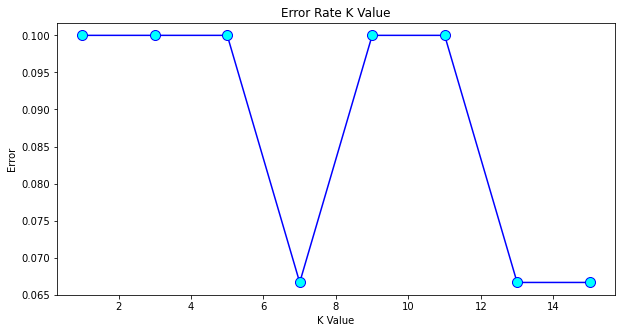

In [9]:
## error rate plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 16,2), error, color='blue', marker='o',
        markerfacecolor='cyan', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.show()

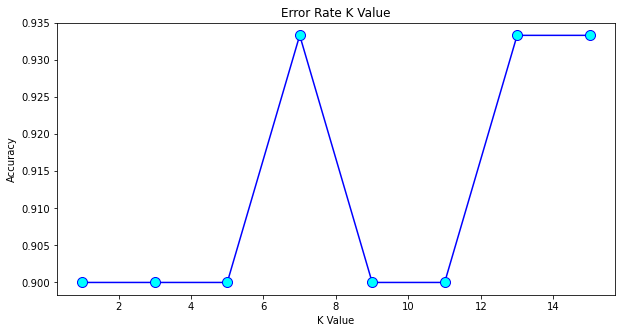

In [10]:
## accuracy_rate
plt.figure(figsize=(10, 5))
plt.plot(range(1, 16,2), accuracy, color='blue', marker='o',
        markerfacecolor='cyan', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

At k=7 model has high accuracy and also least error percent.

In [11]:
model=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2,algorithm='auto')
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

confusion_matrix(y_test,y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  9]], dtype=int64)